Minkowski Distance with r=1: 2.0
Minkowski Distance with r=2: 1.4142135623730951
Minkowski Distance with r=3: 1.2599210498948732
Minkowski Distance with r=4: 1.189207115002721
Minkowski Distance with r=5: 1.148698354997035
Minkowski Distance with r=6: 1.122462048309373
Minkowski Distance with r=7: 1.1040895136738123
Minkowski Distance with r=8: 1.0905077326652577
Minkowski Distance with r=9: 1.080059738892306
Minkowski Distance with r=10: 1.0717734625362931


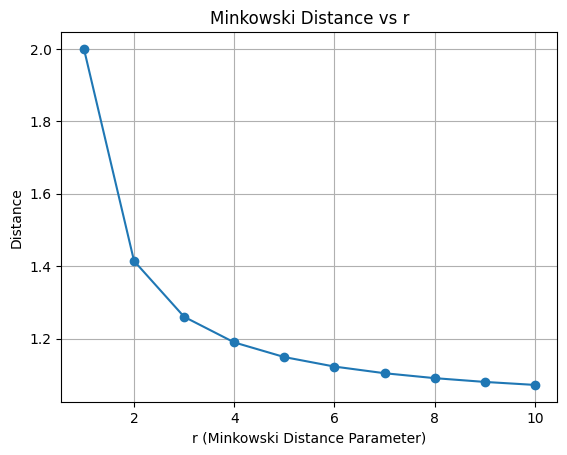

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import minkowski

def calculate_minkowski_distance(vec1, vec2, r):
    """
    Calculate the Minkowski distance between two vectors for a given r.

    Parameters:
    - vec1 (numpy.ndarray): The first feature vector.
    - vec2 (numpy.ndarray): The second feature vector.
    - r (int): The parameter for Minkowski distance.

    Returns:
    - distance (float): The Minkowski distance between the two vectors.
    """
    distance = minkowski(vec1, vec2, p=r)
    return distance

def main():
    # Load the dataset from the Excel file
    df = pd.read_excel('/content/Book1.xlsx')

    # Strip leading/trailing spaces from column names
    df.columns = df.columns.str.strip()

    # Extract texts from ENGLISH column
    english_texts = df['ENGLISH'].tolist()

    # Create a TF-IDF Vectorizer and fit_transform the text data
    vectorizer_english = TfidfVectorizer()
    tfidf_matrix_english = vectorizer_english.fit_transform(english_texts).toarray()

    # Ensure there are at least two feature vectors
    if len(tfidf_matrix_english) < 2:
        raise ValueError("Not enough data to calculate distances. At least two feature vectors are required.")

    # Choose two feature vectors
    vec1 = tfidf_matrix_english[0]  # Example: first feature vector
    vec2 = tfidf_matrix_english[1]  # Example: second feature vector

    # Calculate Minkowski distances for r from 1 to 10
    r_values = range(1, 11)
    distances = [calculate_minkowski_distance(vec1, vec2, r) for r in r_values]

    # Print Minkowski distances for r values from 1 to 10
    for r, distance in zip(r_values, distances):
        print(f"Minkowski Distance with r={r}: {distance}")

    # Plot the distances
    plt.plot(r_values, distances, marker='o')
    plt.xlabel('r (Minkowski Distance Parameter)')
    plt.ylabel('Distance')
    plt.title('Minkowski Distance vs r')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
